# Import Catalog Data

In [1]:
def H(z):
    H0 = 70
    omega0_m = 0.3
    omega0_de = 0.7
    a = 1 / (1+z)
    H = H0 * np.sqrt(omega0_m * a**(-3) + omega0_de) # in km/s/MPC
    H = H * 1000 / (3.086e22) # in s^-1
    H = H * 365.25 * 24 * 3600
    return H

In [2]:
from astropy.io import fits
# Directory of the catalog: where the catalog is located
#cat_dir = '/Users/abdurrouf/Research/students_projects/ITB/JWST_projects/catalogs/ngdeep/'
cat_eazy = fits.open('cosweb-grizli-v6.0-fix.eazypy.zout.fits')
# get the catalog data
cat_eazy_data = cat_eazy[1].data

# Right ascension and declination
ra = cat_eazy_data['ra']
dec = cat_eazy_data['dec']

# redshifts: spectroscopic and photometric redshifts
z_spec = cat_eazy_data['z_spec']
z_phot = cat_eazy_data['z_phot']

# rest-frame magnitudes in U, V, and J bands
restU = cat_eazy_data['restU']
restV = cat_eazy_data['restV']
restJ = cat_eazy_data['restJ']

# stellar mass (SM) and star formation rate (SFR)
SM = cat_eazy_data['mass']
SFR = cat_eazy_data['sfr']

# number of objects (i.e., galaxies)
ngals = len(ra)
print ('Number of galaxies in the catalog: %d' % ngals)

cat_eazy.close()

Number of galaxies in the catalog: 29358


In [3]:
import numpy as np

cat_photo = fits.open('cosweb-grizli-v6.0-fix_phot_apcorr.fits')
# get the catalog data
cat_photo_data = cat_photo[1].data
cat_photo.close()

# check the list of filters and their names from the header information printed above
filter_names = ['f105w', 'f110w','f115w', 'f125w', 'f140w', 'f150w', 'f160w', 'f277w',
                'f350lpu', 'f435w', 'f444w', 'f475w', 'f606w', 'f814w', 'f850lp']
nfilters = len(filter_names)
print ('Number of filters: %d' % nfilters)

# get central wavelength of the filters
filter_cwave = np.zeros(nfilters)
for bb in range(nfilters):
    filter_cwave[bb] = cat_photo[1].header[filter_names[bb]+'_PLAM']
    
# get the fluxes in units of micro Jansky (uJy)
# The measurements were done with circular aperture with 0.7 arcsecond diameter
# Now the fluxes have been corrected for the flux loss due to the small aperture 
flux = {}
flux_err = {}
for bb in range(nfilters):
    flux[filter_names[bb]] = np.zeros(ngals)
    flux_err[filter_names[bb]] = np.zeros(ngals)
    
for ii in range(ngals):
    for bb in range(nfilters):
        #flux[filter_names[bb]][ii] = cat_photo_data[filter_names[bb]+'_flux_aper_2'][ii]
        #flux_err[filter_names[bb]][ii] = cat_photo_data[filter_names[bb]+'_fluxerr_aper_2'][ii]
        flux[filter_names[bb]][ii] = cat_photo_data[filter_names[bb]+'_tot_2'][ii]
        flux_err[filter_names[bb]][ii] = cat_photo_data[filter_names[bb]+'_etot_2'][ii]

Number of filters: 15


# Plot SFR, Cornerplot, and SFH

In [4]:
from piXedfit.piXedfit_fitting import get_bestfit_params
from piXedfit.piXedfit_analysis import plot_SED
from piXedfit.piXedfit_analysis import plot_corner
from piXedfit.piXedfit_analysis import plot_sfh_mcmc

data = '2_pixedfit_mcmc_12486.fits'

params, bfit_params = get_bestfit_params(data)
print (params)
print (bfit_params)

from IPython.display import display, Math
import numpy as np

fit = bfit_params['log_mass']
q = np.diff(fit)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(fit[1], q[0], q[1], r'\log(M_{*}[M_{\odot}])')
display(Math(txt))

fit = bfit_params['log_sfr']
q = np.diff(fit)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(fit[1], q[0], q[1], r'\log(SFR[M_{\odot}yr^{-1}])')
display(Math(txt))

fit = bfit_params['log_mw_age']
q = np.diff(fit)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(fit[1], q[0], q[1], r'\log(Age_{M}[Gyr])')
display(Math(txt))

fit = bfit_params['logzsol']
q = np.diff(fit)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(fit[1], q[0], q[1], r'\log(Z/Z_{\odot})')
display(Math(txt))

fit = 1.086*np.asarray(bfit_params['dust2'])
q = np.diff(fit)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(fit[1], q[0], q[1], r'A_{V}[mag]')
display(Math(txt))

['logzsol', 'log_tau', 'log_alpha', 'log_beta', 'log_age', 'dust2', 'gas_logu', 'log_mass', 'log_sfr', 'log_mw_age']
{'logzsol': [-1.2191453639265786, -0.46069734468979073, -0.00023771448801221702], 'log_tau': [-0.936987793494836, -0.7564702370102435, -0.4703084518636683], 'log_alpha': [0.5304841618642844, 0.7624914802611407, 0.9308497108009004], 'log_beta': [-0.8027172681271803, -0.4247984296807965, 0.2905000937176009], 'log_age': [-0.25985056927319383, -0.056379360564333195, 0.19317655629519254], 'dust2': [0.7530805922150393, 1.1975225414704531, 1.5936161349503122], 'gas_logu': [-3.3411352822894242, -2.2373913541925545, -1.419680131198933], 'log_mass': [10.607075138770991, 10.68855829948039, 10.76725986416809], 'log_sfr': [-2.9212943294604714, -0.8757150690385593, 0.3108143496717098], 'log_mw_age': [-0.39037764029390887, -0.14661970737279192, 0.11342198248141777]}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plotting posteriors probability distributions
=> Number of parameters: 10


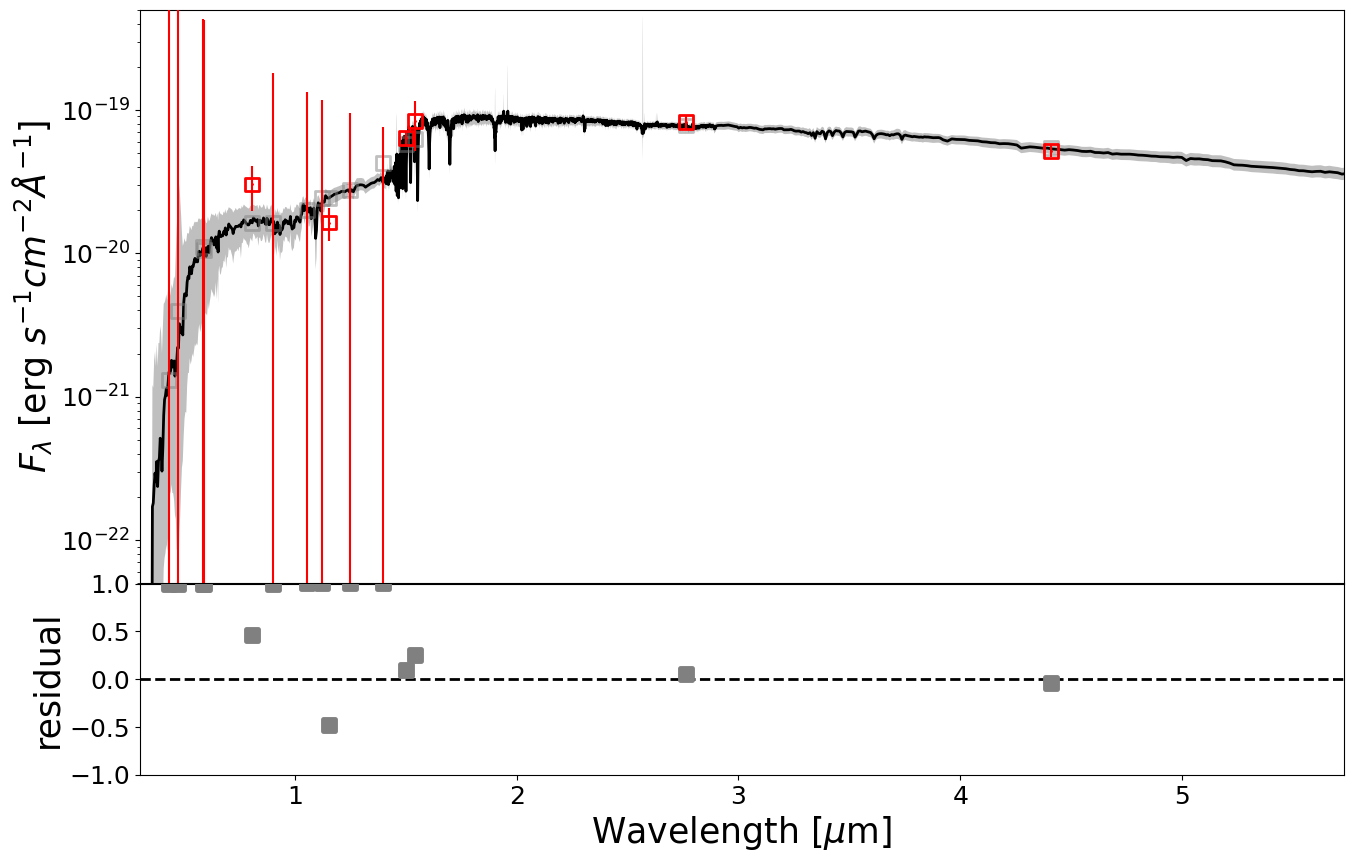

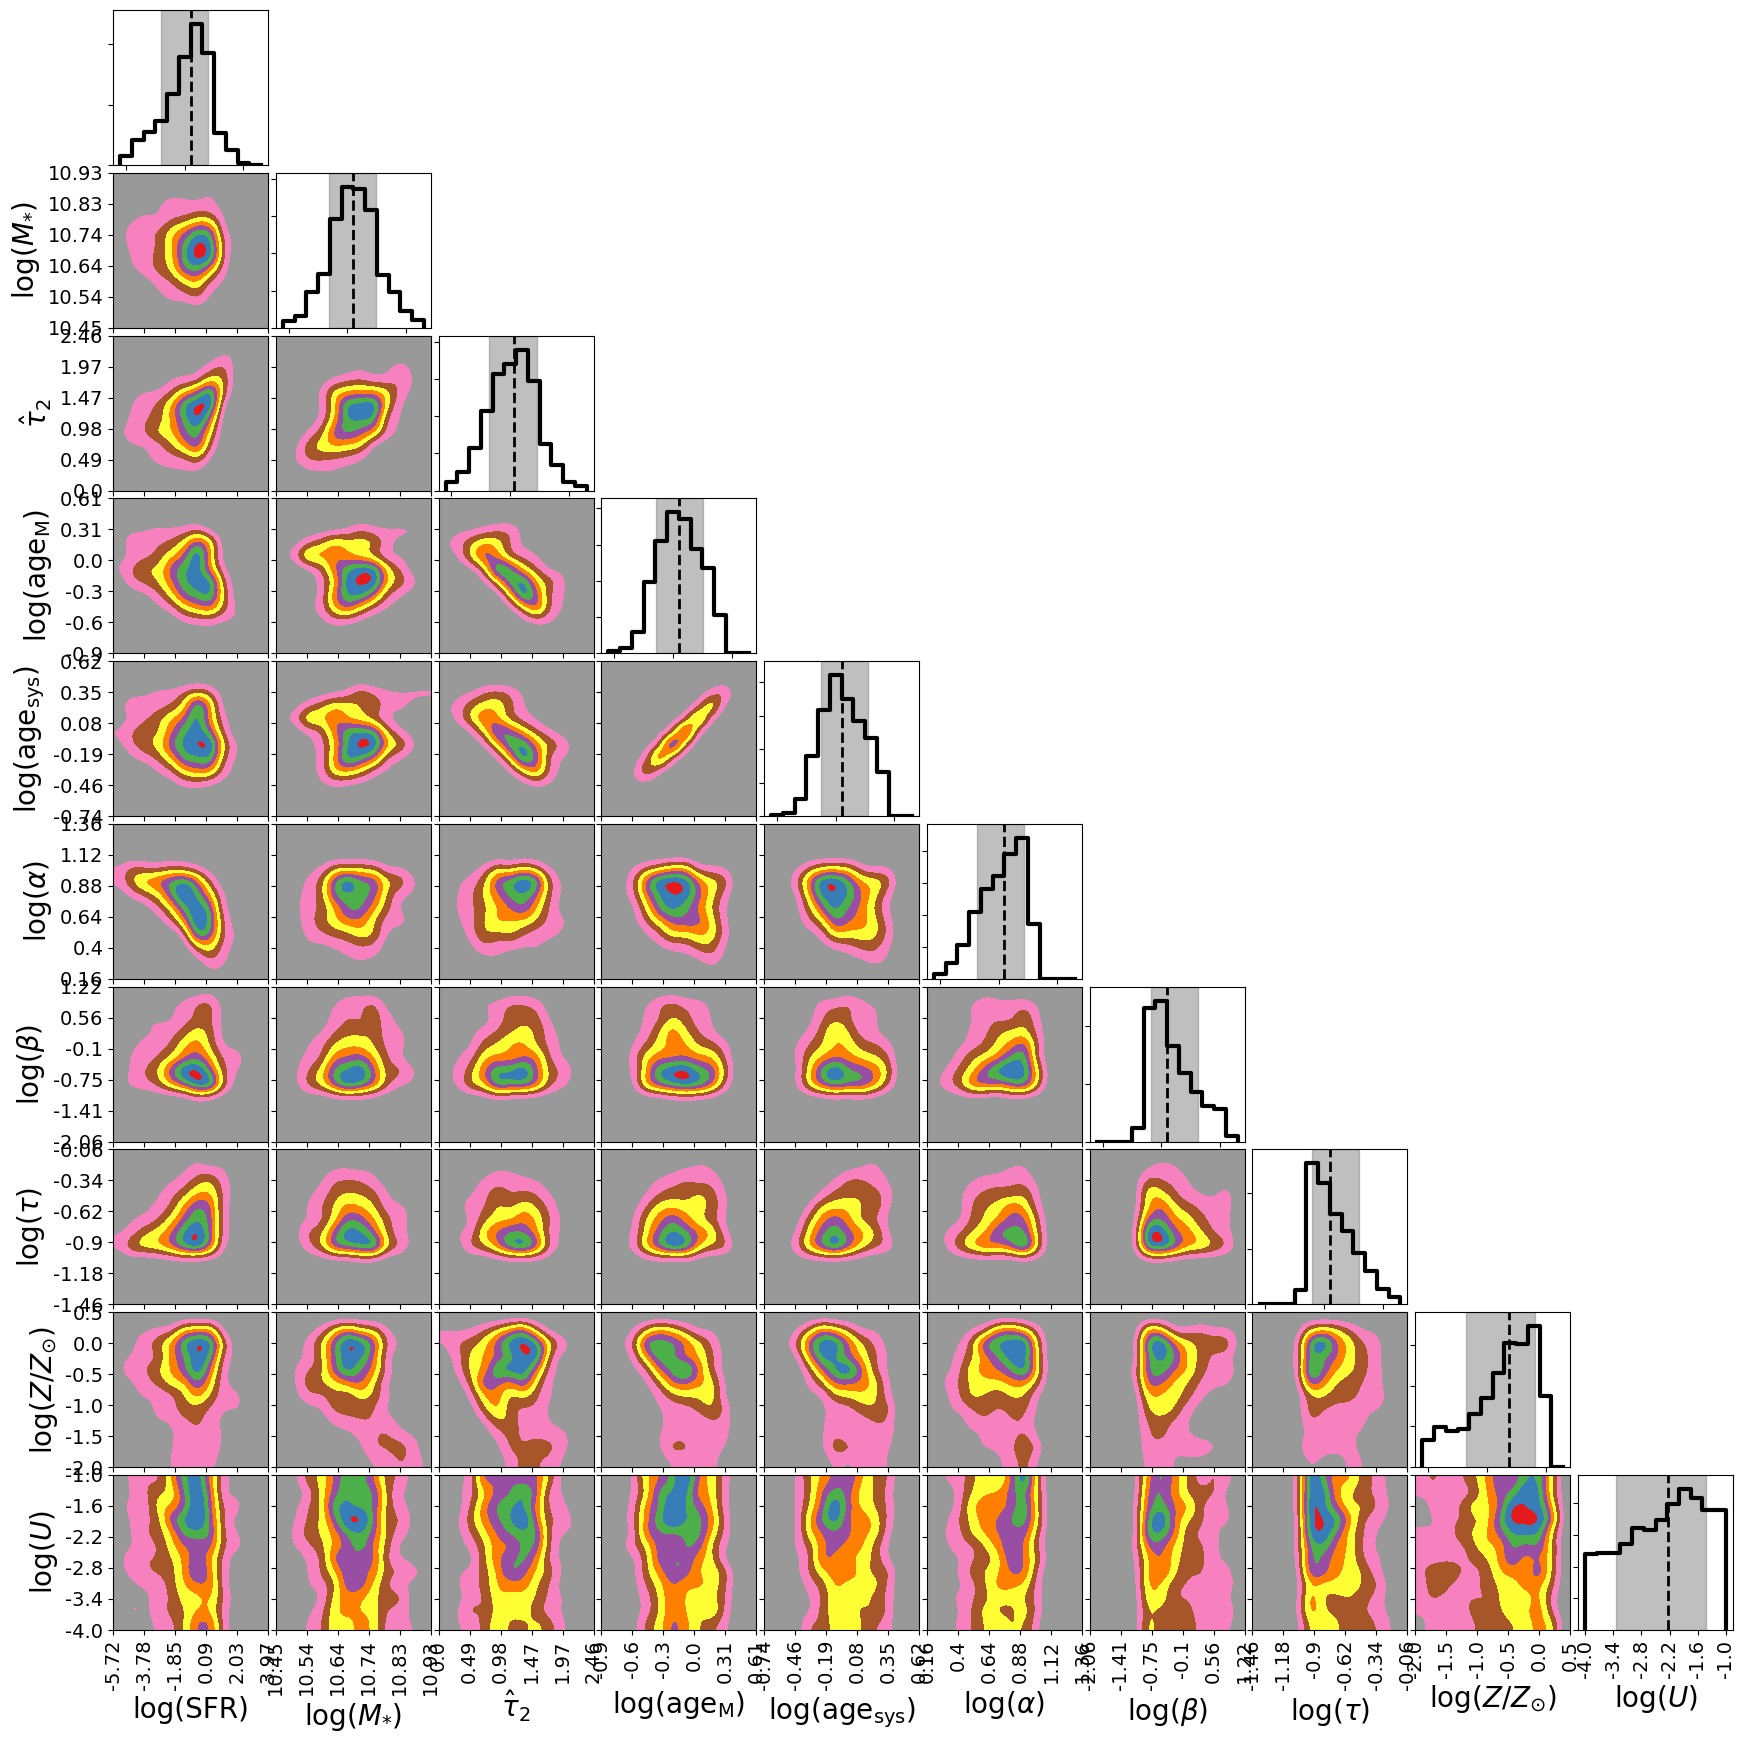

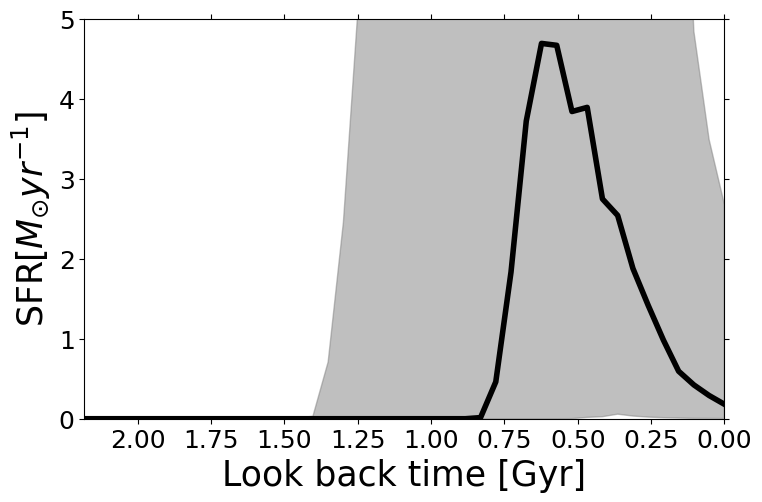

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

name_sampler_fits = data
plot_SED(name_sampler_fits, decompose=0, yrange=[5e-23,5e-19])
plt.savefig('SED.png')
plot_corner(name_sampler_fits)
plt.savefig('CORNER.png')
sfh = plot_sfh_mcmc(name_sampler_fits, yrange=[0,5])
plt.savefig('SFH.png')

# Misc

In [6]:
idx_sel = np.where((z_phot > 2.0) & (z_phot < 7.0) & (-2.5*np.log10(restU / restV) > 1.1) & (-2.5*np.log10(restV / restJ) < 1.8) & (-2.5*np.log10(restU / restV) > 0.88 * -2.5*np.log10(restV / restJ) + 0.29))
ids_sample_galaxies = idx_sel[0]         ## this is ID in the original catalog and it's started from zero
ngals_sample = len(ids_sample_galaxies)

In [7]:
import glob

# Search for files in the same directory as the script
files = glob.glob("*_pixedfit_mcmc_*.fits")
list_id = []

mass_pixedfit = []
sfr_pixedfit = []

mass_eazy = []
sfr_eazy = []
not_quiescent1 = [495, 714, 716, 1153, 1252, 1617, 3565, 3973, 4127, 4245, 4367, 4582, 4616, 4670, 5083, 5493, 5952, 6513, 6864, 7838, 8103, 8407, 8884, 8885, 9039, 9426, 9673, 9800, 9938, 9953, 9987, 11242, 11617, 11768, 12333, 12851, 13214, 13223, 13895, 14201, 14248, 14521, 14748, 14788, 15332, 16255, 18104, 18105, 18693, 19135, 19368, 19924, 20947, 21561, 22679, 22724, 23294, 24131, 24321, 24336, 24830, 24878, 25132, 25835, 25967, 26316, 26875, 28366, 28586, 28832, 29064, 29069]

# Extract and print the id numbers without the '.fits' extension
for file in files:
    if 'ceers' not in file:
        # Remove the '.fits' extension
        file_without_extension = file[:-5]  # Assumes '.fits' is always 5 characters
        # Split the filename using "_" as the separator
        parts = file_without_extension.split("_")

        # Extract the id (assuming it's the third part of the filename)
        if len(parts) >= 4:
            id_number = int(parts[3])
            if (id_number-1) not in not_quiescent1:
                list_id.append(id_number-1)

                mass_eazy.append(SM[id_number-1])
                sfr_eazy.append(SFR[id_number-1])

                params, bfit_params = get_bestfit_params(file)
                mass_pixedfit.append(bfit_params['log_mass'])
                sfr_pixedfit.append(bfit_params['log_sfr'])
        
mass_pixedfit = np.array(mass_pixedfit)
sfr_pixedfit = np.array(sfr_pixedfit)

mass_eazy = np.array(mass_eazy)
sfr_eazy = np.array(sfr_eazy)

list_id = np.array(list_id)

print("Number of fitted galaxies: "+str(len(list_id))+"/"+str(ngals_sample-len(not_quiescent1)))

Number of fitted galaxies: 159/158


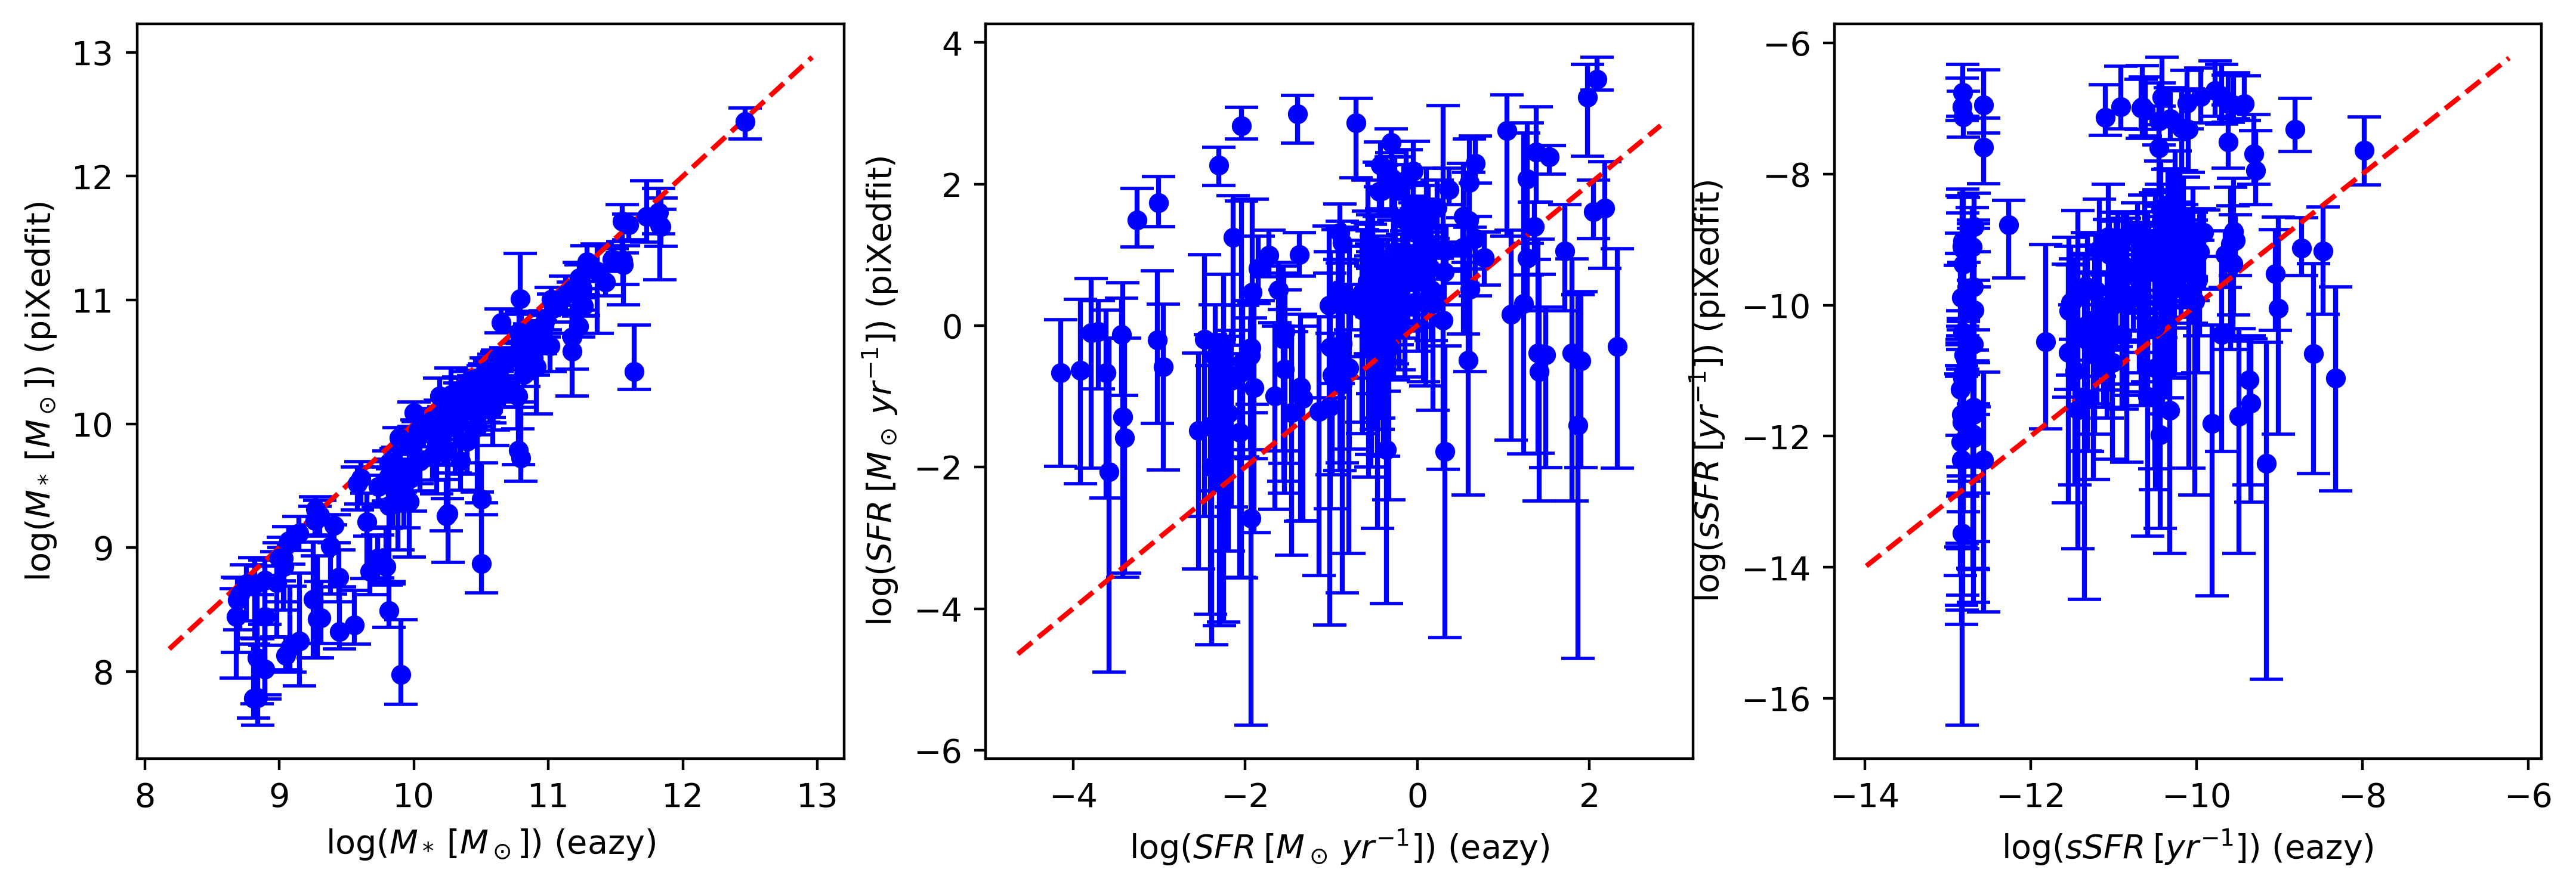

In [8]:
import matplotlib.pyplot as plt

mass_up_error = mass_pixedfit[:,2] - mass_pixedfit[:,1]
mass_low_error = mass_pixedfit[:,1] - mass_pixedfit[:,0]
mass_mid = mass_pixedfit[:,1]

sfr_up_error = sfr_pixedfit[:,2] - sfr_pixedfit[:,1]
sfr_low_error = sfr_pixedfit[:,1] - sfr_pixedfit[:,0]
sfr_mid = sfr_pixedfit[:,1]

ssfr_up_error = np.sqrt(sfr_up_error**2 + mass_up_error**2)
ssfr_low_error = np.sqrt(sfr_low_error**2 + mass_low_error**2)
ssfr_mid = sfr_mid-mass_mid

mass_min = np.log10(mass_eazy).min() - 0.5
mass_max = np.log10(mass_eazy).max() + 0.5
mass = np.linspace(mass_min, mass_max, 100)

sfr_min = np.log10(sfr_eazy).min() - 0.5
sfr_max = np.log10(sfr_eazy).max() + 0.5
sfr = np.linspace(sfr_min, sfr_max, 100)

ssfr_min = ssfr_mid.min() - 0.5
ssfr_max = ssfr_mid.max() + 0.5
ssfr = np.linspace(ssfr_min, ssfr_max, 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4), dpi=400)

ax1.errorbar(np.log10(mass_eazy), mass_mid, yerr=[mass_low_error, mass_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax1.plot(mass,mass,c='red', linestyle='--')
ax1.set_ylabel(r'$\log(M_*\: [M_\odot])$ (piXedfit)')
ax1.set_xlabel(r'$\log(M_*\: [M_\odot])$ (eazy)')

ax2.errorbar(np.log10(sfr_eazy), sfr_mid, yerr=[sfr_low_error, sfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax2.plot(sfr,sfr,c='red', linestyle='--')
ax2.set_ylabel(r'$\log(SFR\: [M_\odot\: yr^{-1}])$ (piXedfit)')
ax2.set_xlabel(r'$\log(SFR\: [M_\odot\: yr^{-1}])$ (eazy)')

ax3.errorbar(np.log10(sfr_eazy/mass_eazy), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax3.plot(ssfr,ssfr,c='red', linestyle='--')
ax3.set_ylabel(r'$\log(sSFR\: [yr^{-1}])$ (piXedfit)')
ax3.set_xlabel(r'$\log(sSFR\: [yr^{-1}])$ (eazy)')

plt.show()

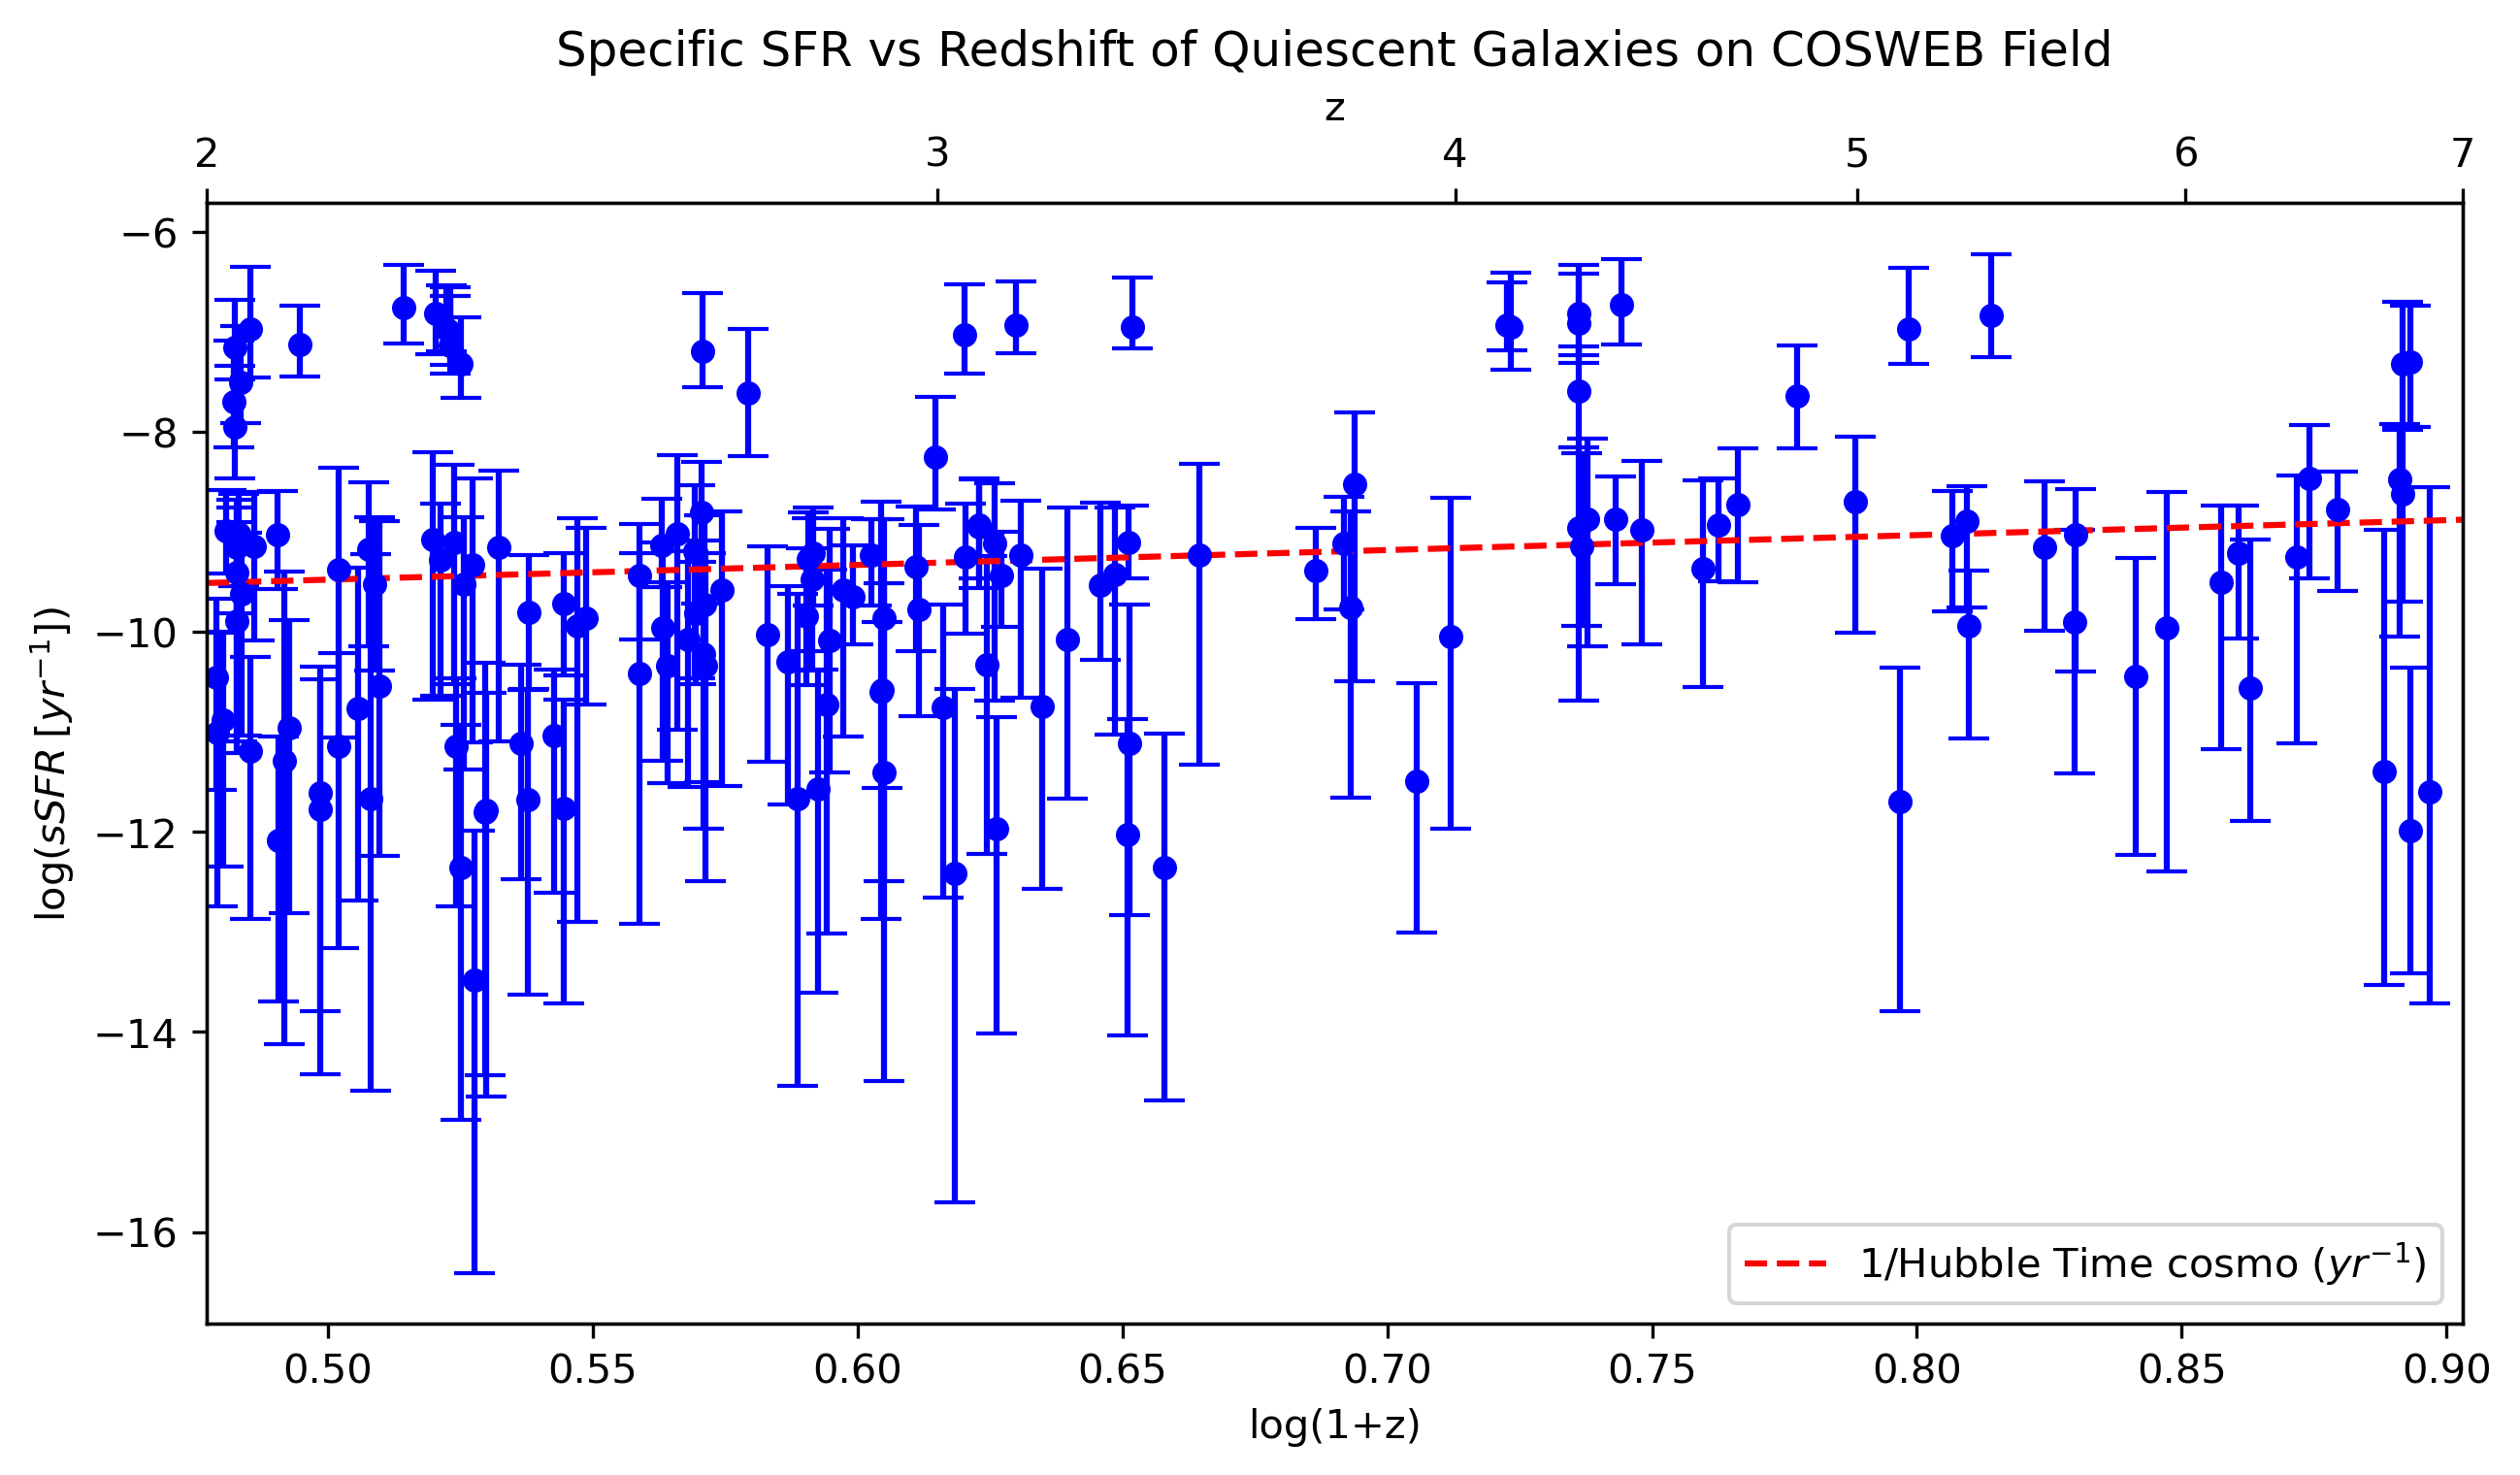

In [9]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

z = np.linspace(2,7,100)
t = cosmo.age(z)
hubble = 1/t * 1e-9

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.set_xlim(np.log10(3), np.log10(8))

ax1.errorbar(np.log10(z_phot[list_id]+1), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')

ax2 = plt.twiny()

# Set the limits and label for the second x-axis
ax2.set_xlim(np.log10(2),np.log10(7))

# Define the positions for the ticks
new_tick_positions = np.array([2,3,4,5,6,7])
log_ticks = np.log10(new_tick_positions)

# Set the ticks and labels for the second x-axis
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([2,3,4,5,6,7])

# Set label for the second x-axis
ax2.set_xlabel('z_phot')

plt.title('Specific SFR vs Redshift of Quiescent Galaxies on COSWEB Field')        
ax1.set_xlabel('log(1+z)')
ax2.set_xlabel('z')
ax1.set_ylabel(r'log($sSFR\: [yr^{-1}]$)')
#plt.show()


# Set the limits and label for the second y-axis
#plt.xlabel(r'$log(1+z_{phot})$')
z = np.linspace(2,7,100)

ax1.plot(np.log10(1+z), np.log10(hubble.value), label=r"1/Hubble Time cosmo $(yr^{-1})$", linestyle='--', color='red')


#ax1.plot(np.log10(1+z), np.log10(H(z)), label=r"1/Hubble Time $(yr^{-1})$", linestyle='--', color='red')
ax1.legend()
plt.show()

In [10]:
def age(z):
    t = 2/3 * 1/H(0) * ((1+z)**(-3/2))
    return t/1e9

def log_sfr(logM,z):
    t = age(z)
    m = (0.84 - 0.026 * t)
    c = 6.51 - 0.11 * t
    if z > 5:
        m = 0.8 - 0.022 * t
        c = 6.09 - 0.07 * t
    val = m * logM - c
    return val

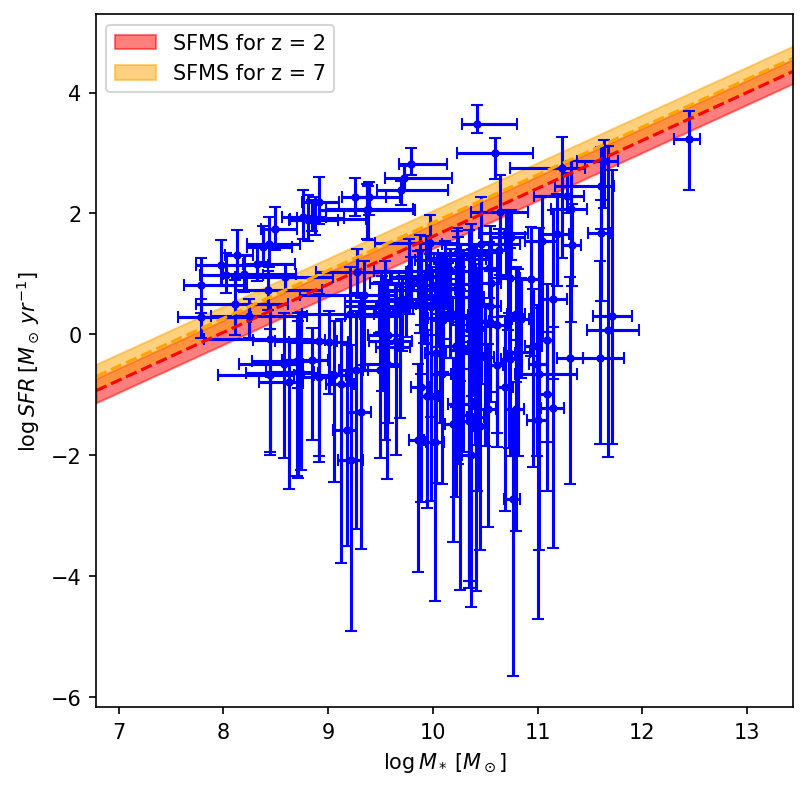

In [11]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_mid, sfr_mid, xerr = [mass_low_error, mass_up_error], yerr = [sfr_low_error, sfr_up_error], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

#plt.scatter(mass_mid, sfr_mid)

plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$')
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.savefig('newmodel_sfms.png')
plt.show()

## SFMS Selected Quiescent Galaxies

In [12]:
z_sel = z_phot[list_id]
idx_sfms = np.where(sfr_mid < log_sfr(mass_mid,2)-0.2)

mass_sel = mass_mid[idx_sfms]
sfr_sel = sfr_mid[idx_sfms]
mass_low_sel = mass_low_error[idx_sfms]
mass_up_sel = mass_low_error[idx_sfms]
sfr_low_sel = sfr_low_error[idx_sfms]
sfr_up_sel = sfr_up_error[idx_sfms]

ssfr_up_sel = np.sqrt(sfr_up_sel**2 + mass_up_sel**2)
ssfr_low_sel = np.sqrt(sfr_low_sel**2 + mass_low_sel**2)
ssfr_sel = sfr_sel-mass_sel

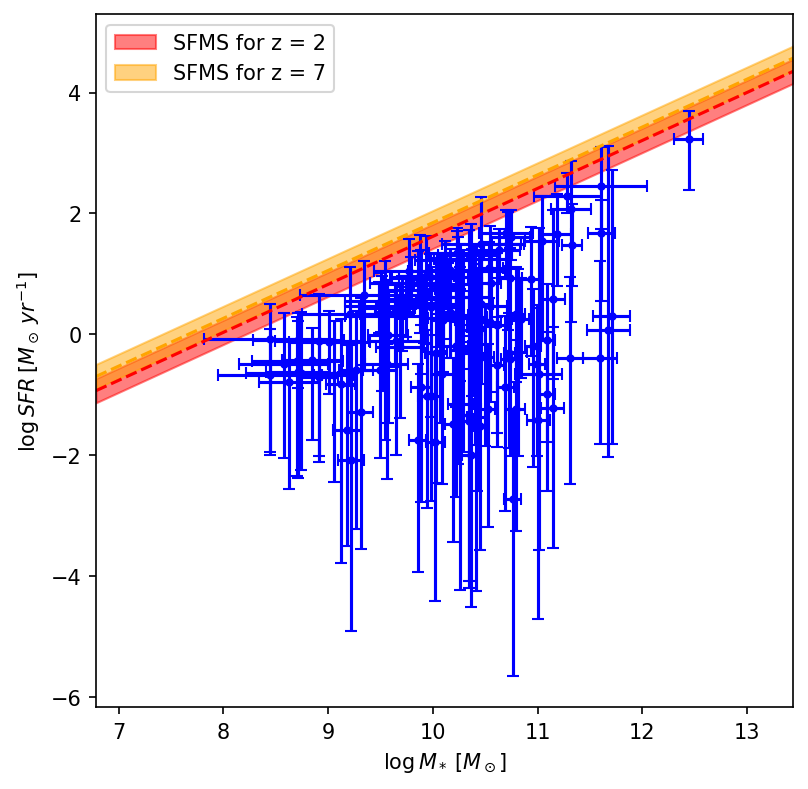

In [13]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_sel, sfr_sel, xerr = [mass_low_sel, mass_up_sel], yerr = [sfr_low_sel, sfr_up_sel], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

#plt.scatter(mass_mid, sfr_mid)

plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$')
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.show()

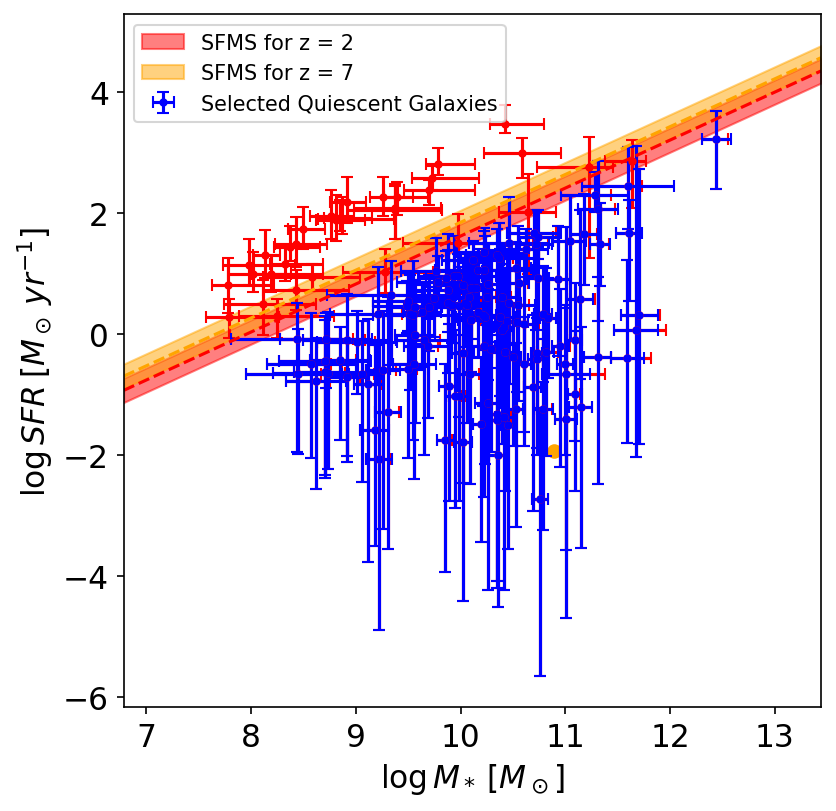

In [14]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_mid, sfr_mid, xerr = [mass_low_error, mass_up_error], yerr = [sfr_low_error, sfr_up_error], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'red')
plt.errorbar(mass_sel, sfr_sel, xerr = [mass_low_sel, mass_up_sel], yerr = [sfr_low_sel, sfr_up_sel], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue', label='Selected Quiescent Galaxies')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')
tes_id = 520
plt.scatter(np.log10(SM[tes_id]), np.log10(SFR[tes_id]), c = 'orange')
#plt.scatter(mass_mid, sfr_mid)

plt.xlabel(r'$\log{M_*\: [M_\odot]}$', size=15)
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$', size=15)

plt.tick_params(axis='both', which='both', labelsize=15)
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.savefig('SFMS_ppt.png')
plt.show()

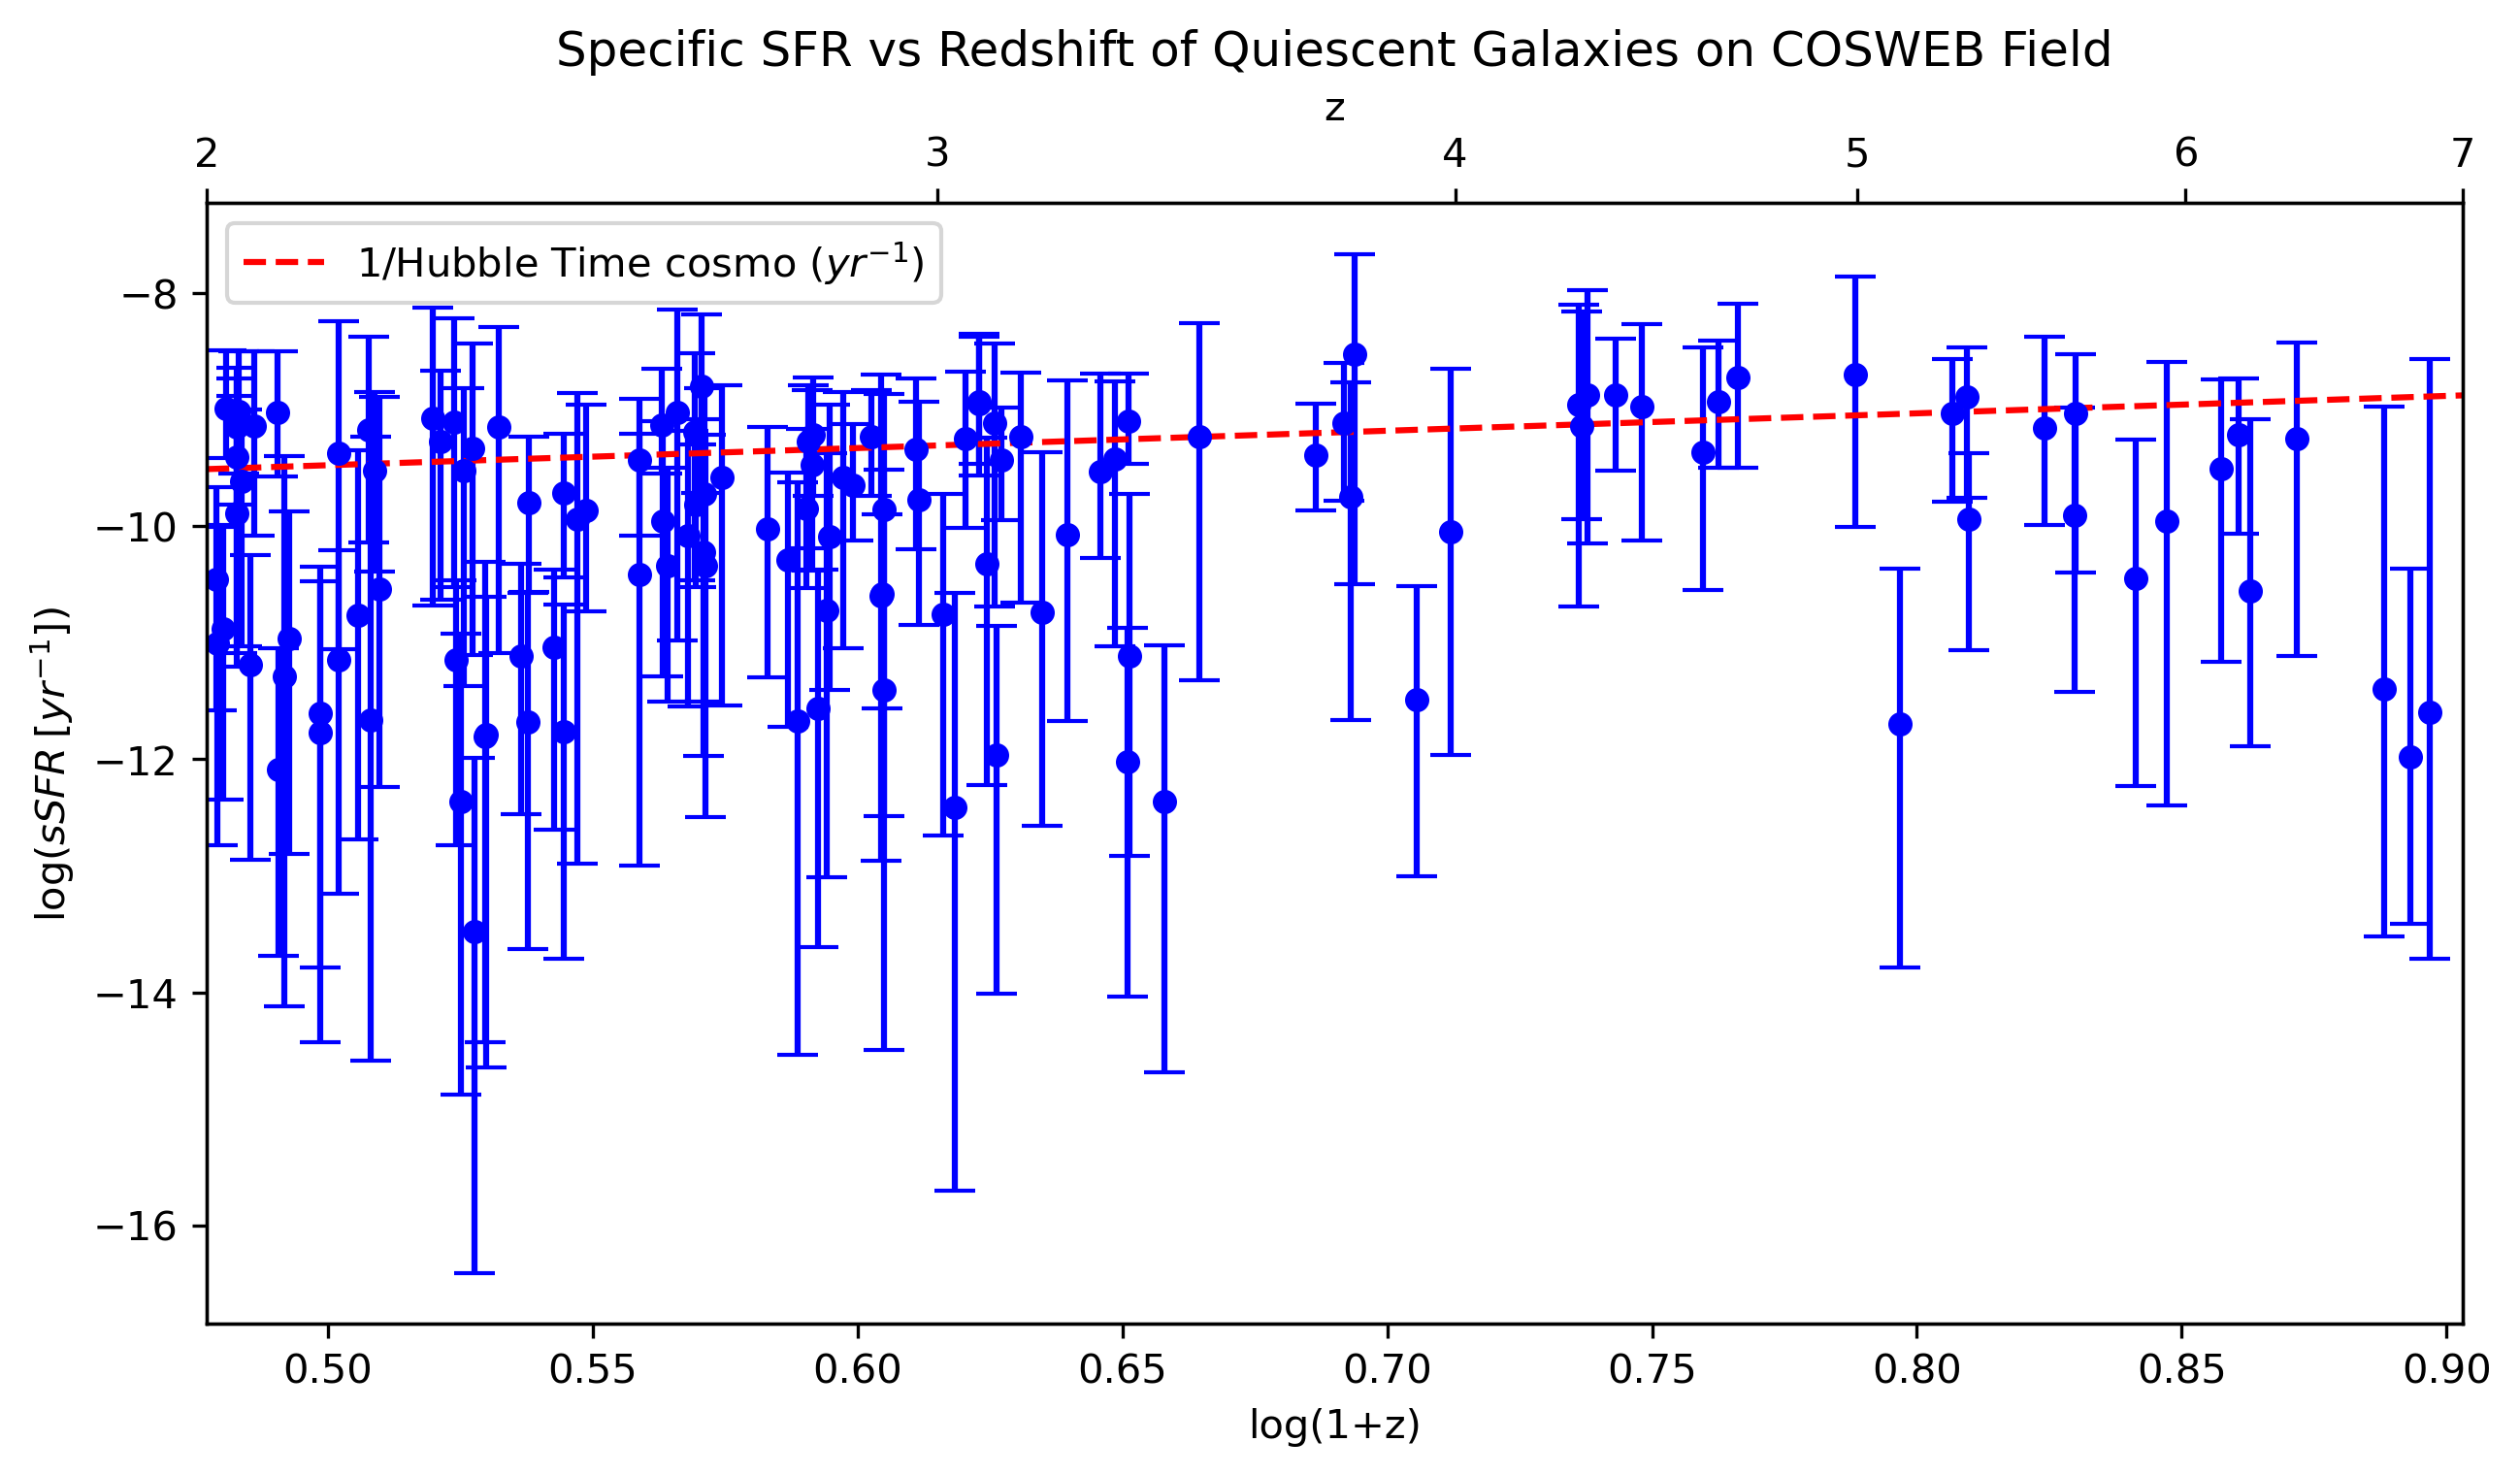

In [15]:
fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.set_xlim(np.log10(3), np.log10(8))

ax1.errorbar(np.log10(z_sel[idx_sfms]+1), ssfr_sel, yerr=[ssfr_low_sel, ssfr_up_sel], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')

ax2 = plt.twiny()

# Set the limits and label for the second x-axis
ax2.set_xlim(np.log10(2),np.log10(7))

# Define the positions for the ticks
new_tick_positions = np.array([2,3,4,5,6,7])
log_ticks = np.log10(new_tick_positions)

# Set the ticks and labels for the second x-axis
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([2,3,4,5,6,7])

# Set label for the second x-axis
ax2.set_xlabel('z_phot')

plt.title('Specific SFR vs Redshift of Quiescent Galaxies on COSWEB Field')        
ax1.set_xlabel('log(1+z)')
ax2.set_xlabel('z')
ax1.set_ylabel(r'log($sSFR\: [yr^{-1}]$)')
#plt.show()


# Set the limits and label for the second y-axis
#plt.xlabel(r'$log(1+z_{phot})$')
z = np.linspace(2,7,100)

ax1.plot(np.log10(1+z), np.log10(hubble.value), label=r"1/Hubble Time cosmo $(yr^{-1})$", linestyle='--', color='red')
ax1.legend()
plt.show()

## Combined

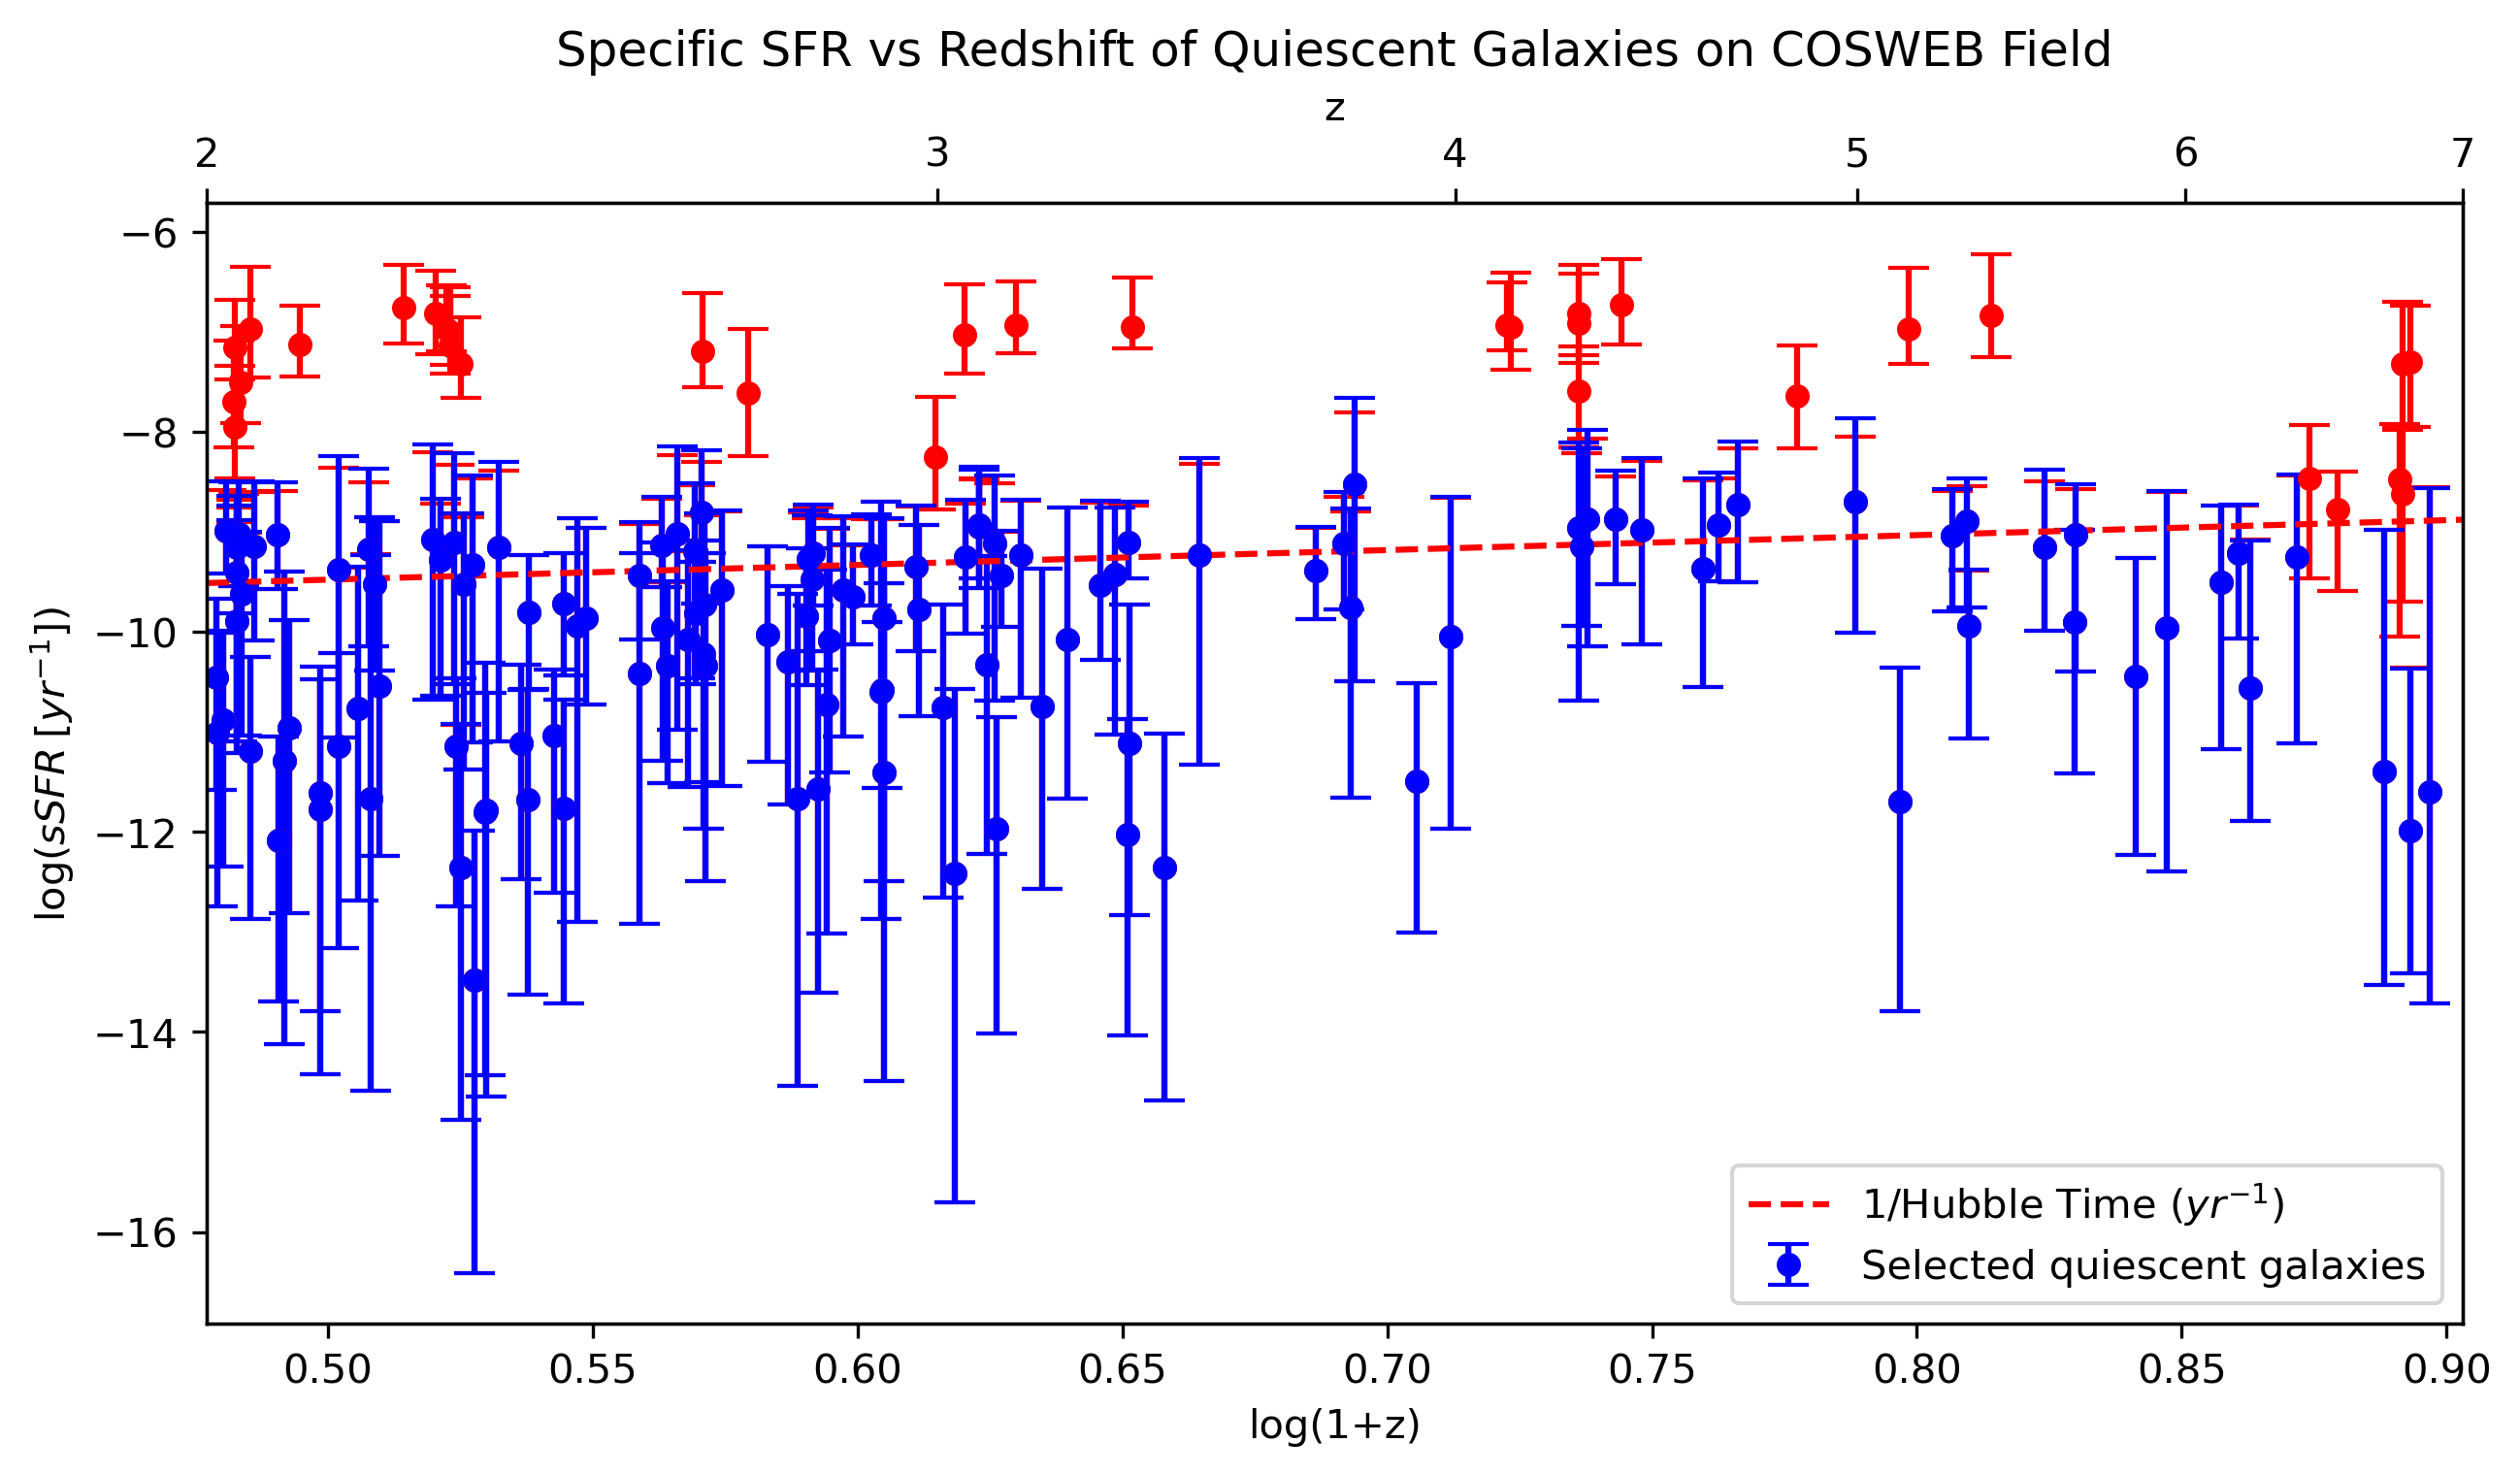

In [16]:
fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.set_xlim(np.log10(3), np.log10(8))

ax1.errorbar(np.log10(z_phot[list_id]+1), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'red')
ax1.errorbar(np.log10(z_sel[idx_sfms]+1), ssfr_sel, yerr=[ssfr_low_sel, ssfr_up_sel], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue', label='Selected quiescent galaxies')


ax2 = plt.twiny()

# Set the limits and label for the second x-axis
ax2.set_xlim(np.log10(2),np.log10(7))

# Define the positions for the ticks
new_tick_positions = np.array([2,3,4,5,6,7])
log_ticks = np.log10(new_tick_positions)

# Set the ticks and labels for the second x-axis
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([2,3,4,5,6,7])

# Set label for the second x-axis
ax2.set_xlabel('z_phot')

plt.title('Specific SFR vs Redshift of Quiescent Galaxies on COSWEB Field')        
ax1.set_xlabel('log(1+z)')
ax2.set_xlabel('z')
ax1.set_ylabel(r'log($sSFR\: [yr^{-1}]$)')
#plt.show()


# Set the limits and label for the second y-axis
#plt.xlabel(r'$log(1+z_{phot})$')
z = np.linspace(2,7,100)

ax1.plot(np.log10(1+z), np.log10(hubble.value), label=r"1/Hubble Time $(yr^{-1})$", linestyle='--', color='red')

ax1.legend()
plt.savefig('sSFR.png')
plt.show()

## sSFR Selected Quiescent Galaxies

In [17]:
idx_ssfr = np.where(sfr_mid-mass_mid < np.log10(H(z_phot[list_id])))

mass_sel1 = mass_mid[idx_ssfr]
sfr_sel1 = sfr_mid[idx_ssfr]
mass_low_sel1 = mass_low_error[idx_ssfr]
mass_up_sel1 = mass_low_error[idx_ssfr]
sfr_low_sel1 = sfr_low_error[idx_ssfr]
sfr_up_sel1 = sfr_up_error[idx_ssfr]

ssfr_up_sel1 = np.sqrt(sfr_up_sel1**2 + mass_up_sel1**2)
ssfr_low_sel1 = np.sqrt(sfr_low_sel1**2 + mass_low_sel1**2)
ssfr_sel1 = sfr_sel1-mass_sel1

z_sel1 = z_phot[list_id][idx_ssfr]

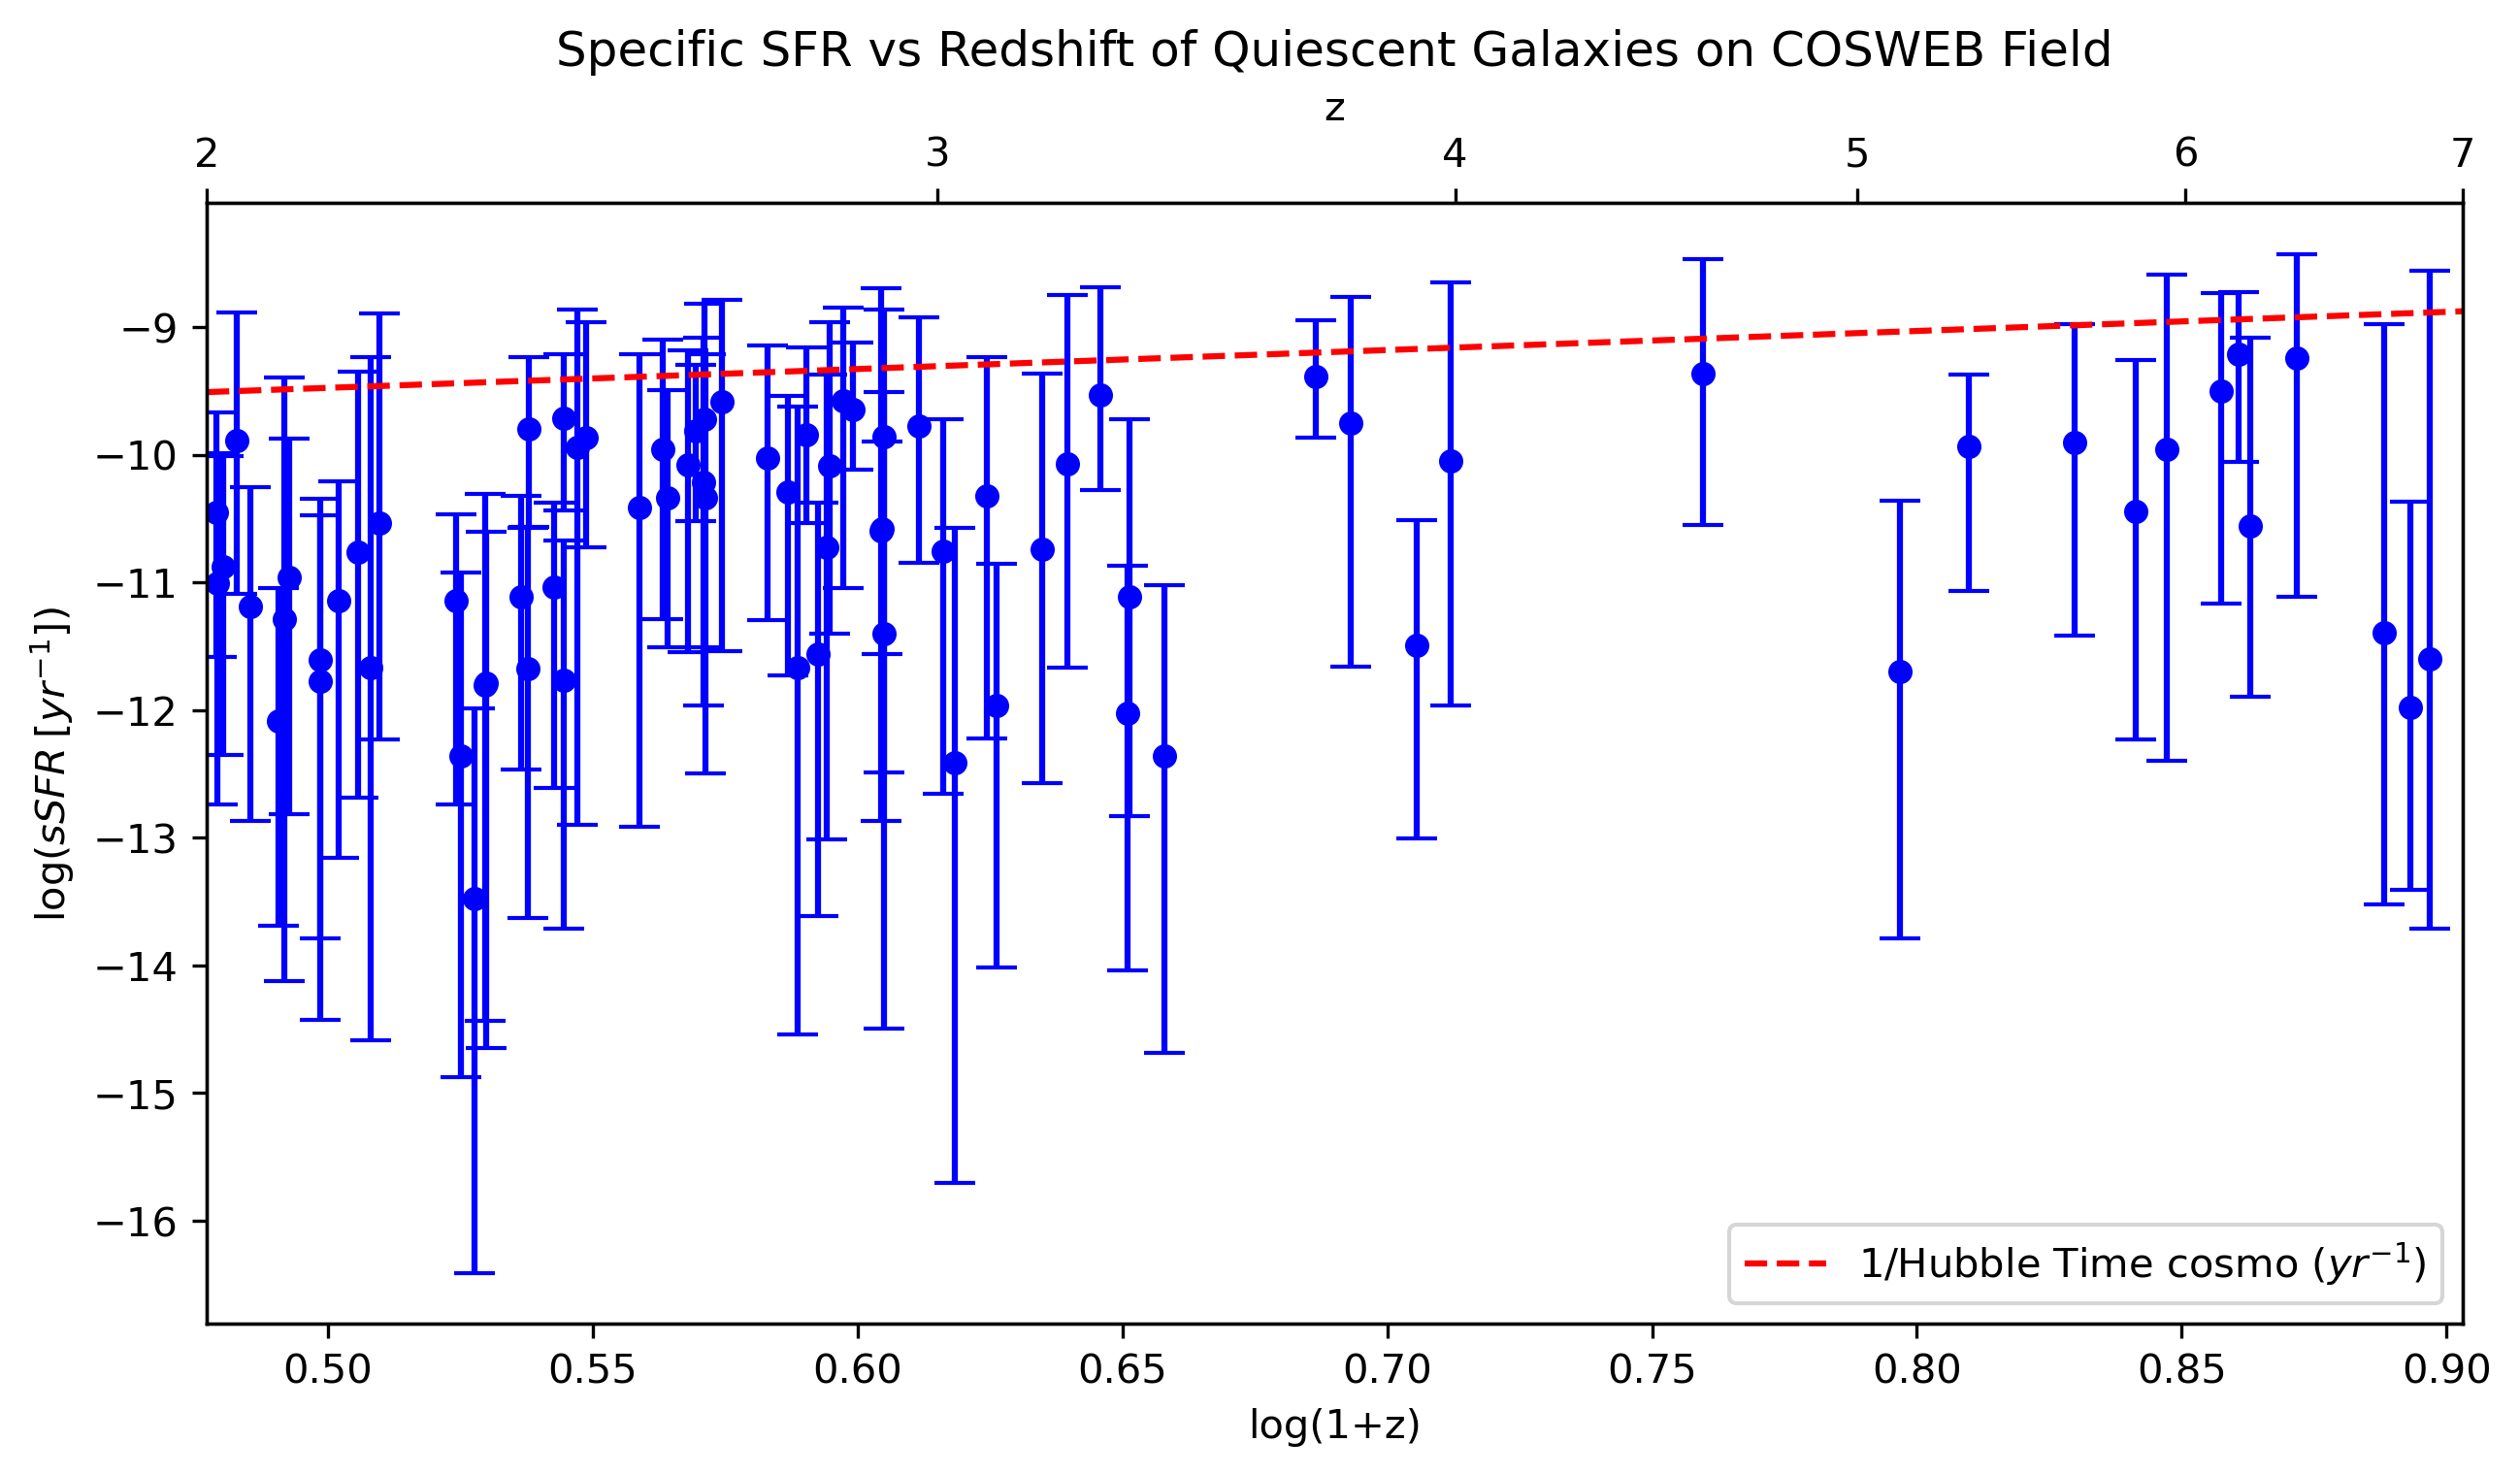

In [18]:
fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.set_xlim(np.log10(3), np.log10(8))

ax1.errorbar(np.log10(z_sel1+1), ssfr_sel1, yerr=[ssfr_low_sel1, ssfr_up_sel1], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
#ax1.errorbar(np.log10(z_phot[list_id]+1), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue', label='star-forming')

ax2 = plt.twiny()

# Set the limits and label for the second x-axis
ax2.set_xlim(np.log10(2),np.log10(7))

# Define the positions for the ticks
new_tick_positions = np.array([2,3,4,5,6,7])
log_ticks = np.log10(new_tick_positions)

# Set the ticks and labels for the second x-axis
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([2,3,4,5,6,7])

# Set label for the second x-axis
ax2.set_xlabel('z_phot')

plt.title('Specific SFR vs Redshift of Quiescent Galaxies on COSWEB Field')        
ax1.set_xlabel('log(1+z)')
ax2.set_xlabel('z')
ax1.set_ylabel(r'log($sSFR\: [yr^{-1}]$)')
#plt.show()


# Set the limits and label for the second y-axis
#plt.xlabel(r'$log(1+z_{phot})$')
z = np.linspace(2,7,100)

ax1.plot(np.log10(1+z), np.log10(hubble.value), label=r"1/Hubble Time cosmo $(yr^{-1})$", linestyle='--', color='red')

ax1.legend()
plt.show()

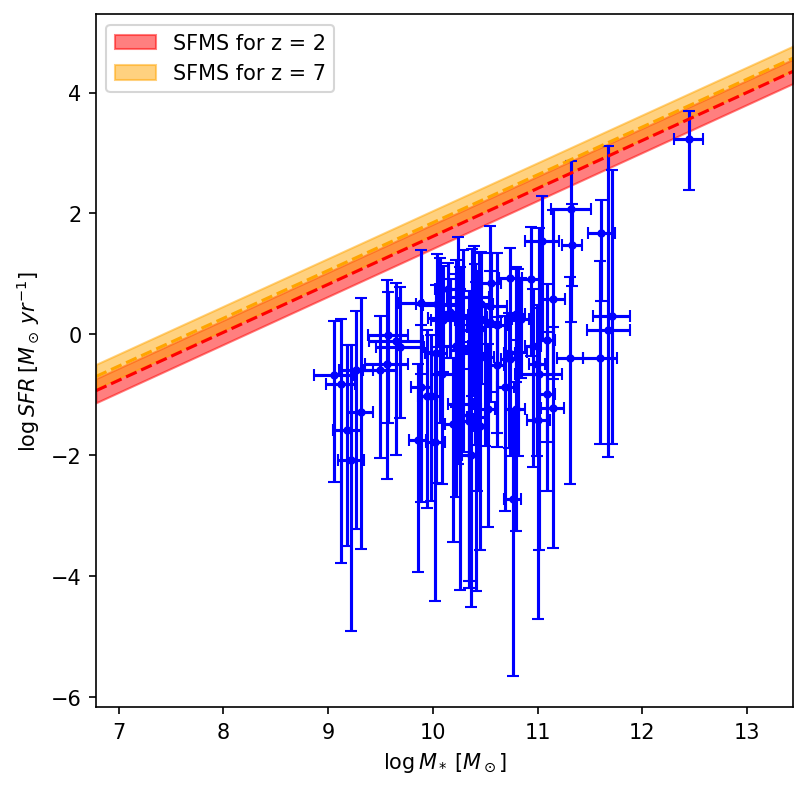

In [19]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_sel1, sfr_sel1, xerr = [mass_low_sel1, mass_up_sel1], yerr = [sfr_low_sel1, sfr_up_sel1], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

#plt.scatter(mass_mid, sfr_mid)

plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$')
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.show()

## Combined

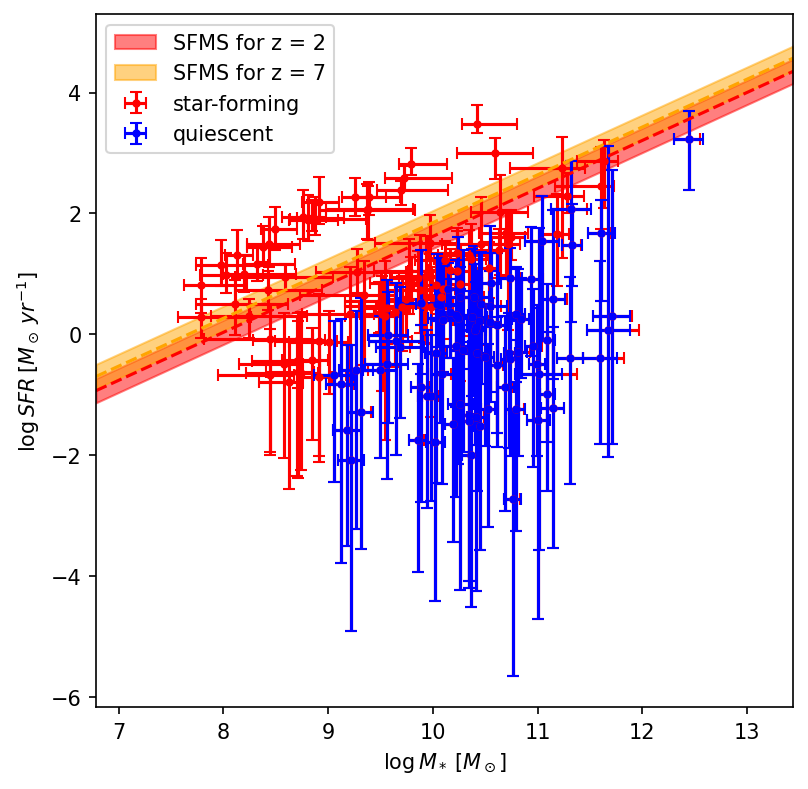

In [20]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_mid, sfr_mid, xerr = [mass_low_error, mass_up_error], yerr = [sfr_low_error, sfr_up_error], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'red', label='star-forming')
plt.errorbar(mass_sel1, sfr_sel1, xerr = [mass_low_sel1, mass_up_sel1], yerr = [sfr_low_sel1, sfr_up_sel1], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue', label='quiescent')


plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

#plt.scatter(mass_mid, sfr_mid)

plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$')
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.show()

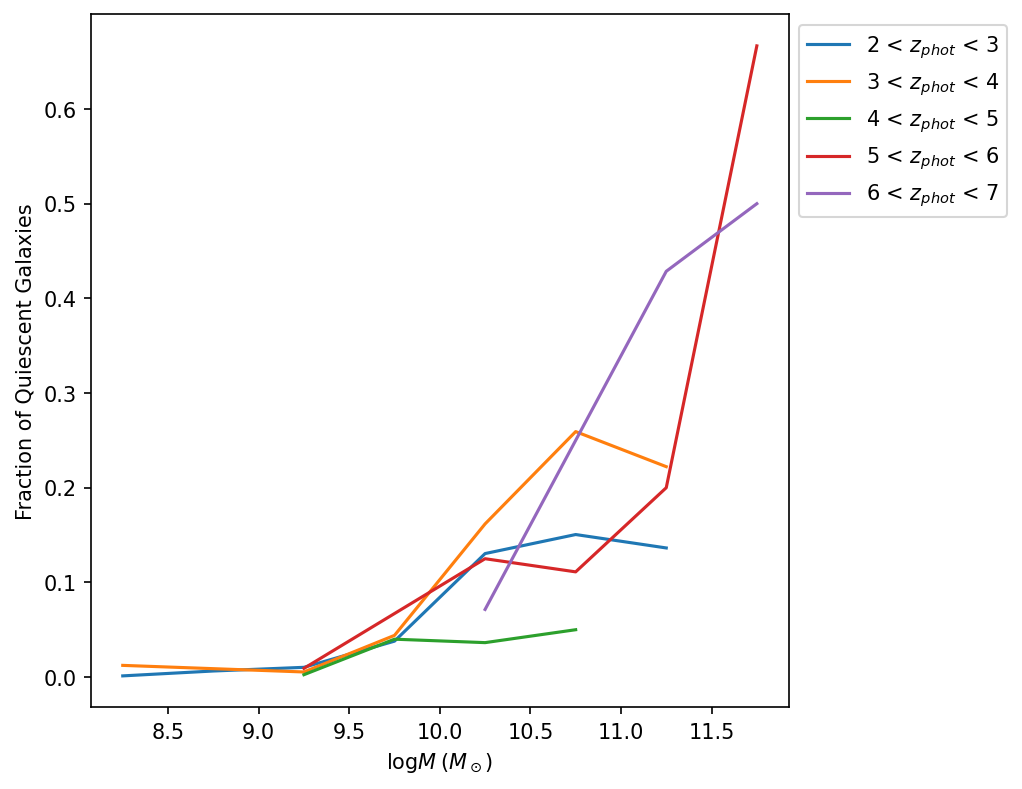

In [21]:
import math
z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = 0.5
bin_gap_rs = 1

plt.figure(figsize=(6,6), dpi = 150)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

for i in range(0,math.ceil(5/bin_gap_rs)):
    
    list_frac_dum = []
    list_mass_dum = []
    list_qui_dum = []
    
    idx_sel_tot = np.where((z_phot > (2+i*bin_gap_rs)) & (z_phot < (2+(i+1)*bin_gap_rs)))
    idx_sel_qui = np.where((z_qui > (2+i*bin_gap_rs)) & (z_qui < (2+(i+1)*bin_gap_rs)))
    
    if len(idx_sel_qui[0]) > 0:
        
        for j in range(0,math.ceil(12/bin_gap_mass)):
            idx_sel_mass_tot = np.where((np.log10(SM[idx_sel_tot[0]]) > (j * bin_gap_mass)) & (np.log10(SM[idx_sel_tot[0]]) < (j+1) * bin_gap_mass))
            idx_sel_mass_qui = np.where((mass_sel[idx_sel_qui[0]] > (j * bin_gap_mass)) & (mass_sel[idx_sel_qui[0]] < (j+1) * bin_gap_mass))
            
            if len(idx_sel_mass_qui[0]) > 0:
                
                list_frac_dum.append(len(idx_sel_mass_qui[0])/len(idx_sel_mass_tot[0]))
                list_mass_dum.append((j+0.5)*bin_gap_mass)
                list_qui_dum.append(len(idx_sel_mass_qui[0]))
            
        list_frac = np.array(list_frac_dum)
        list_mass = np.array(list_mass_dum)
        list_qui = np.array(list_qui_dum)
        plt.plot(list_mass, list_frac, label=str(2+i*bin_gap_rs) + r' < $z_{phot}$ < ' + str(2+(i+1)*bin_gap_rs))
        #plt.scatter(list_mass, list_frac)
        plt.xlabel(r'log$M\: (M_\odot)$')
        plt.ylabel('Fraction of Quiescent Galaxies')
        plt.legend(loc='upper left', bbox_to_anchor=(1,1))

#plt.xlim(6,12)
#plt.ylim(0,0.2)
plt.show()
        
            

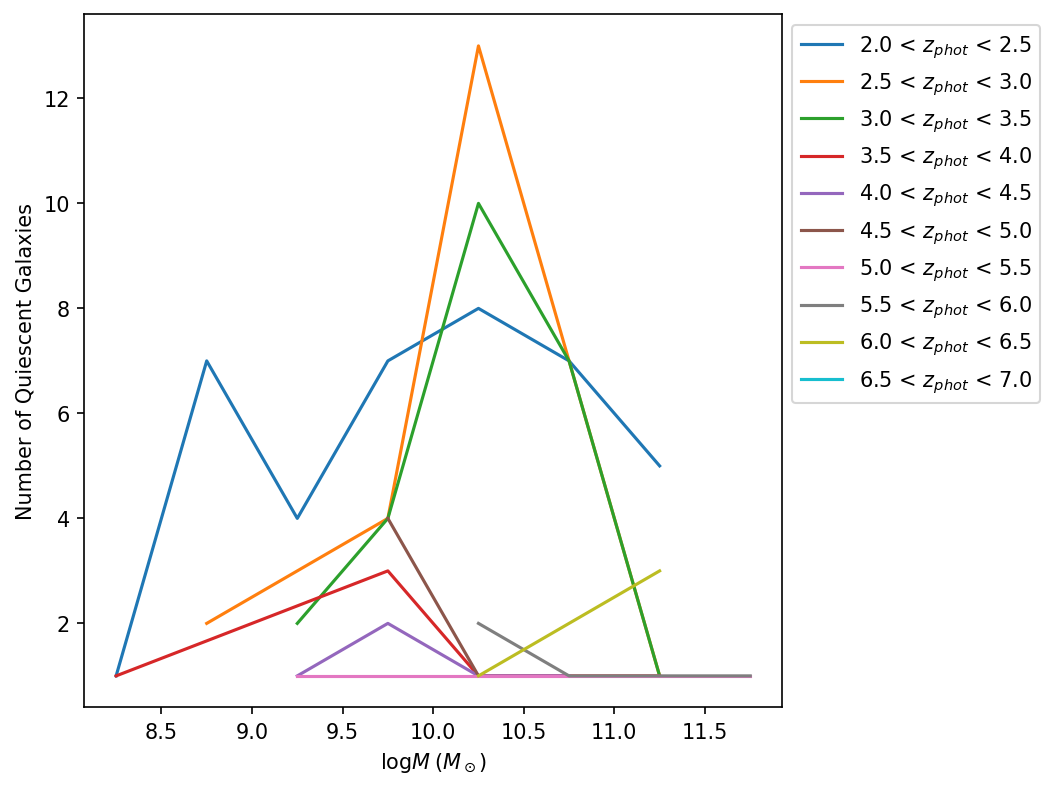

In [24]:
import math
z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = 0.5
bin_gap_rs = 0.5

plt.figure(figsize=(6,6), dpi = 150)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

for i in range(0,math.ceil(5/bin_gap_rs)):
    
    list_frac_dum = []
    list_mass_dum = []
    list_qui_dum = []
    
    idx_sel_tot = np.where((z_phot > (2+i*bin_gap_rs)) & (z_phot < (2+(i+1)*bin_gap_rs)))
    idx_sel_qui = np.where((z_qui > (2+i*bin_gap_rs)) & (z_qui < (2+(i+1)*bin_gap_rs)))
    
    if len(idx_sel_qui[0]) > 0:
        
        for j in range(0,math.ceil(12/bin_gap_mass)):
            idx_sel_mass_tot = np.where((np.log10(SM[idx_sel_tot[0]]) > (j * bin_gap_mass)) & (np.log10(SM[idx_sel_tot[0]]) < (j+1) * bin_gap_mass))
            idx_sel_mass_qui = np.where((mass_sel[idx_sel_qui[0]] > (j * bin_gap_mass)) & (mass_sel[idx_sel_qui[0]] < (j+1) * bin_gap_mass))
            
            if len(idx_sel_mass_qui[0]) > 0:
                
                list_frac_dum.append(len(idx_sel_mass_qui[0])/len(idx_sel_mass_tot[0]))
                list_mass_dum.append((j+0.5)*bin_gap_mass)
                list_qui_dum.append(len(idx_sel_mass_qui[0]))
            
        list_frac = np.array(list_frac_dum)
        list_mass = np.array(list_mass_dum)
        list_qui = np.array(list_qui_dum)
        plt.plot(list_mass, list_qui, label=str(2+i*bin_gap_rs) + r' < $z_{phot}$ < ' + str(2+(i+1)*bin_gap_rs))
        #plt.scatter(list_mass, list_frac)
        plt.xlabel(r'log$M\: (M_\odot)$')
        plt.ylabel('Number of Quiescent Galaxies')
        plt.legend(loc='upper left', bbox_to_anchor=(1,1))

#plt.xlim(6,12)
#plt.ylim(0,0.2)
plt.show()
        
            